<h1><center>AI/ML Challenge</center></h1>

A hospital in the province of Greenland has been trying to improve its care conditions by looking at historic survival of the patients. They tried looking at their data but could not identify the main factors leading to high survivals.


<h4><i>Objective:</i></h4>
You are the best data scientist in Greenland and they've hired you to solve this problem. Now you are responsible for developing a model that will predict the chances of survival of a patient after 1 year of treatment (Survived_1_year).


<h4><i>Evaluation Criteria:</i></h4>
Submissions are evaluated using the F1 Score. How do we do it? 

Once you generate and submit the target variable predictions on evaluation dataset, your submissions will be compared with the true values of the target variable. 

The True or Actual values of the target variable are hidden on the DPhi Practice platform so that we can evaluate your model's performance on evaluation data. Finally, an F1 score for your model will be generated and displayed

<h4><i>About the dataset</i></h4>
The dataset contains the patient records collected from a hospital in Greenland. The "Survived_1_year" column is a target variable which has binary entries (0 or 1).

Survived_1_year == 0, implies that the patient did not survive after 1 year of treatment

Survived_1_year == 1, implies that the patient survived after 1 year of treatment

To load the dataset in your jupyter notebook, use the below command:

import pandas as pd:

pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

<h4><i>Data Description:</i></h4>

ID_Patient_Care_Situation: Care situation of a patient during treatment

Diagnosed_Condition: The diagnosed condition of the patient

ID_Patient: Patient identifier number

Treatment_with_drugs: Class of drugs used during treatment

Survived_1_year: If the patient survived after one year (0 means did not survive; 1 means survived)

Patient_Age: Age of the patient

Patient_Body_Mass_Index: A calculated value based on the patient’s weight, height, etc.

Patient_Smoker: If the patient was a smoker or not

Patient_Rural_Urban: If the patient stayed in Rural or Urban part of the country

Previous_Condition: Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case. )

Feel free to google 'Diagnose' and 'Body Mass Index' if you don't know about these terms.

To load the test dataset in your jupyter notebook, use the below command:


test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

<h4><i>Submission guidelines:</i></h4>
1. Your predictions file must be a CSV and its first row i.e header field must be prediction

2. You must upload .ipynb notebook file as a solution to the question

<h4><i>Evaluation Metric:</i></h4>
F1Score evaluation metric is used for evaluating model predictions

<center><h2>1: DATA COLLECTION</h2></center>

#### 1.1: Import libraries:

In [1]:
#libraries for data manipulation
import pandas as pd #data analysis & manipulation
import numpy as np #numerical data manipulation
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization
import missingno as msno #visualization of null values

#Data preprocessing and spliting
from sklearn.preprocessing import MinMaxScaler #data normalization
from sklearn.model_selection import train_test_split #splitting of data into train and test

#libraries for model building (machine learning)
from sklearn.tree import DecisionTreeClassifier #Decision tree model
from sklearn.naive_bayes import GaussianNB #Naive Bayes model
from sklearn.linear_model import LogisticRegression #Logistic Regression model

#Model evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#### 1.2: import Dataset:

In [2]:
#read dataset as csv
train = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

##### Data description/overview:

In [3]:
#First 5 rows/entries 
train.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [5]:
#Statistical information about numerical columns of the dataset
train.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [4]:
#General info about the data and its datatype
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

<h3><center>Summary of step 1:</center></h3>

* A dataset with 23097 entries/rows, 18 columns (9 non-null and 9 null).
* The data types include: 9 float64, 5 int64 and 4 object/complex/Non-primitive/Reference/mixed Data types

<h2><center>2: DATA CLEANING</center></h2>

#### 2.1: Check & Handle missing values:

###### A: Check missing values

In [5]:
null = train.isnull().sum() #check features with missing value
null_per = null/len(train)*100 #calculate percentage of total values that are missing per column
null_table = pd.concat([null, null_per], axis=1) #present both in a tabular form
null_table_ren_columns = null_table.rename(columns={0: 'Number of missing values', 1: '% of missing values'}) #Rename table columns
null_table_ren_columns = null_table_ren_columns[null_table_ren_columns.iloc[:] !=0].sort_values('Number of missing values', ascending=False).round(2) #Sort and round up values to 2 decimal

null_table_ren_columns

,Number of missing values,% of missing values
A,1235.0,5.35
B,1235.0,5.35
C,1235.0,5.35
D,1235.0,5.35
E,1235.0,5.35
F,1235.0,5.35
Z,1235.0,5.35
Number_of_prev_cond,1235.0,5.35
Treated_with_drugs,13.0,0.06
ID_Patient_Care_Situation,NaN,NaN


###### B: Visualize missing values

<AxesSubplot:>

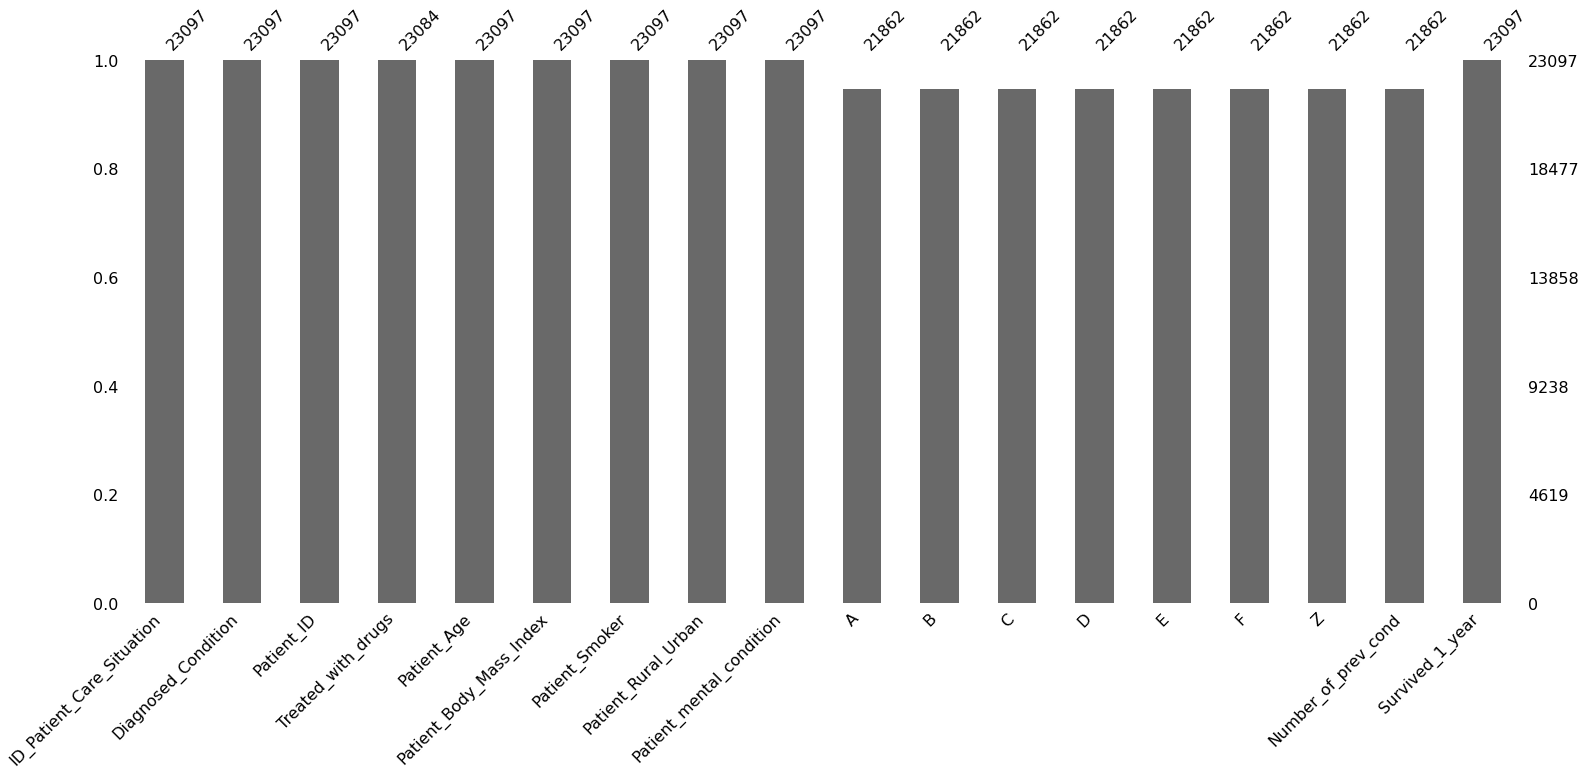

In [6]:
#visualize missing values (bar chart)
msno.bar(train)

<i><center>On the left side of the plot, the y-axis scale ranges from 0.0 to 1.0, where 1.0 represents 100% data completeness. If the bar is less than this, it indicates that we have missing values within that column.
On the right side of the plot, the scale is measured in index values. With the top right representing the maximum number of rows within the dataframe.
Along the top of the plot, there are a series of numbers that represent the total count of the non-null values within that column.
In this example we can see that a number of the columns (A, B, C etc) have a large amount of missing values. Other columns are complete and have the maximum number of values.</center></i>

<AxesSubplot:>

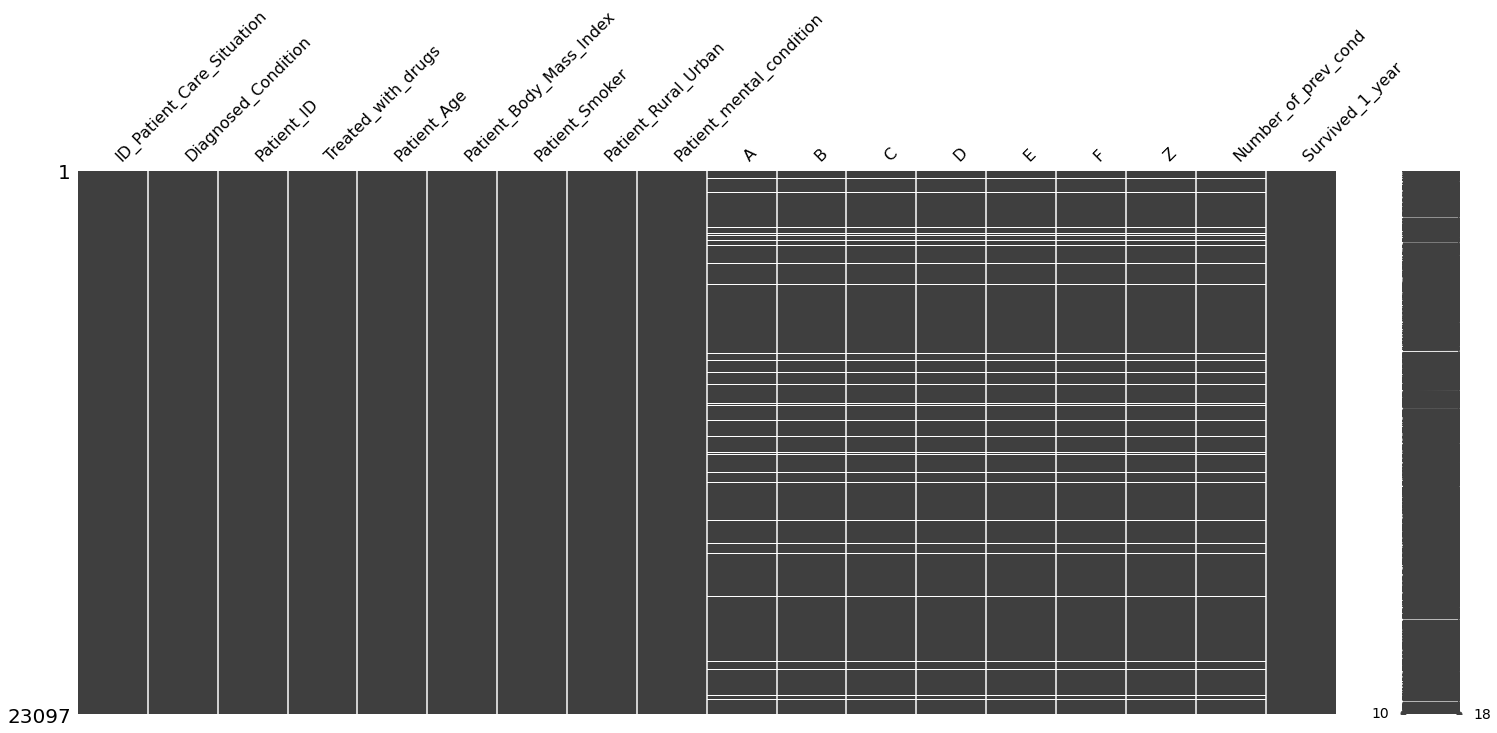

In [7]:
#visualize null value distribution (matrix chart)
msno.matrix(train)

<AxesSubplot:>

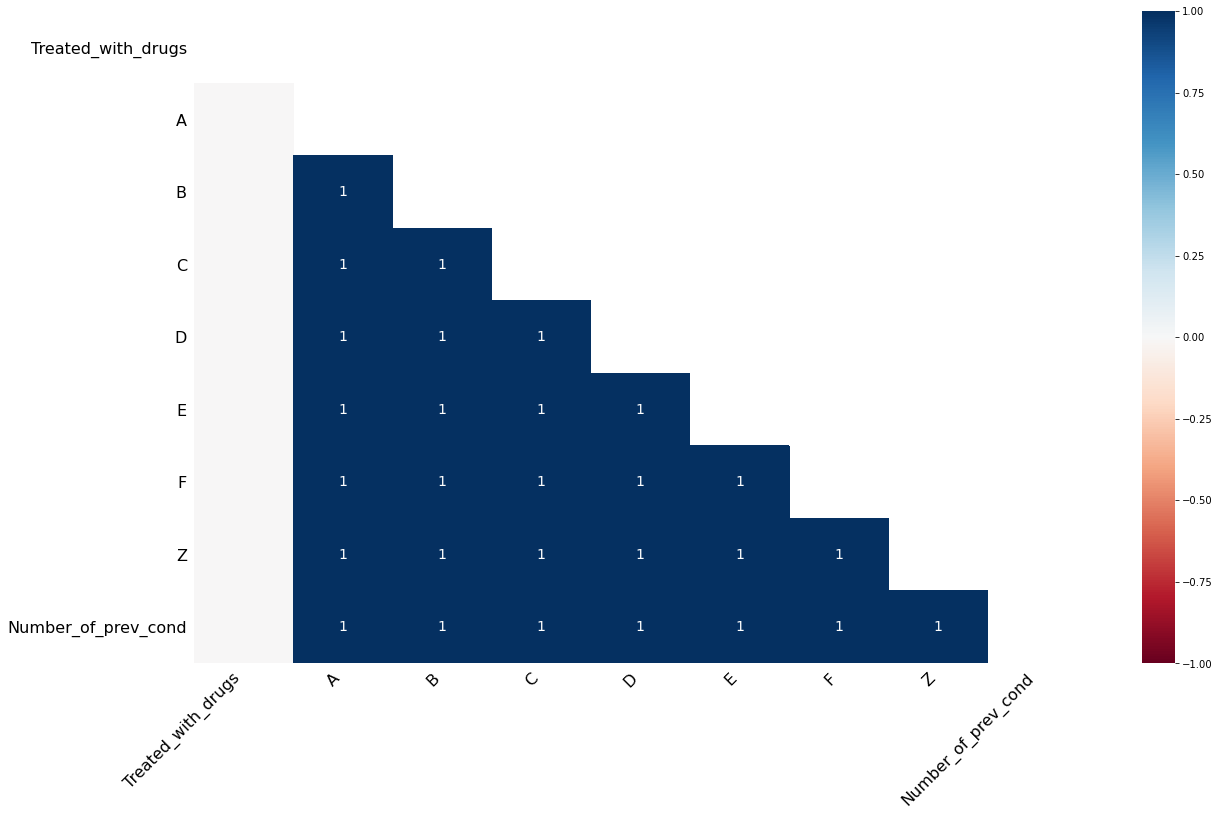

In [8]:
#visualizing relationships between columns with null values (using heatmap)
msno.heatmap(train)

<i><center>The heatmap is used to identify correlations of the nullity between each of the different columns. In other words, it can be used to identify if there is a relationship in the presence of null values between each of the columns. Values close to positive 1 indicate that the presence of null values in one column is correlated with the presence of null values in another column. In this case, maximum relationship exist between A, B, C, D, E, F, Z & Number_of_prev_cond and the aforementioned columns have no association with Treated_with_drugs column.</center></i>

<AxesSubplot:>

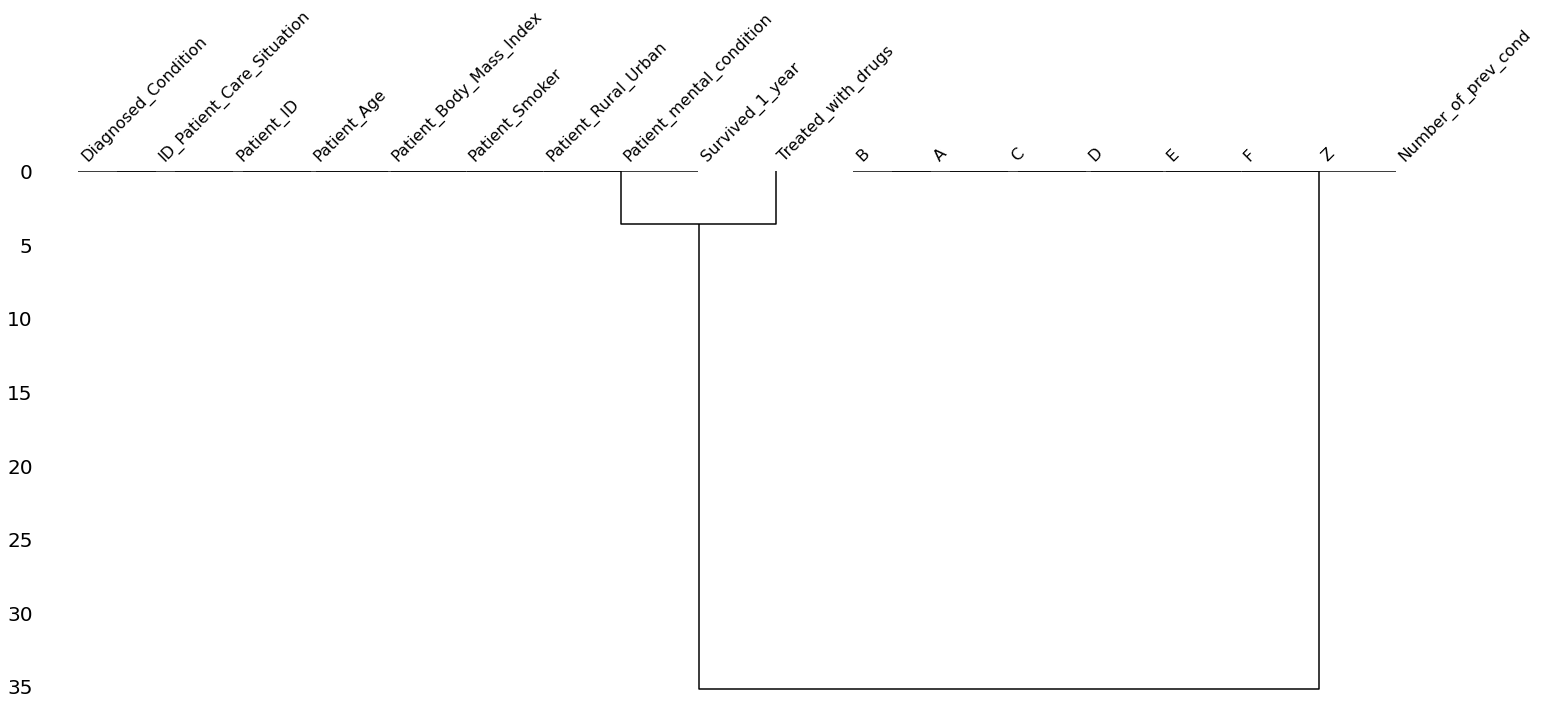

In [9]:
#visualize null value distribution using dendrogram
msno.dendrogram(train)

<i><center>The dendrogram plot provides a tree-like graph generated through hierarchical clustering and groups together columns that have strong correlations in nullity. If a number of columns are grouped together at level zero, then the presence of nulls in one of those columns is directly related to the presence or absence of nulls in the others columns. The more separated the columns in the tree, the less likely the null values can be correlated between the columns. In this case, nullity in 'Treated_with_drugs' column influences the target column compared to other columns with null values.</center></i>

###### C: Handle/treat missing values

In [10]:
train_copy = train.dropna(subset=['Treated_with_drugs']) #drop the null entries since the percentage
                                                         #of nullity is below 2%.

#Since <Number_of_prev_cond> is a categorical data type, I used mode to fill.
train_copy = train_copy.copy() #Handles SettingWithCopyWarning
train_copy.Number_of_prev_cond.fillna(train_copy.Number_of_prev_cond.mode()[0], inplace=True)

train_copy.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,10808,45,7977,DX6,47,26.155120,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


<h3><center>Summary of step 2:</center></h3>

* 9 out of the 18 columns contains null values but only the null value in one of the columns impacts the target variable (as seen in the dendrogram).
* At times, the missing information is valuable itself, and to impute it with the most common class won’t be appropriate. In such a case, we can replace them with a value like “Unknown” or “Missing” using the fillna() method (in this case, I filled with 3 because its and int and abstract to the data point).

#### <h2><center>3: FEATURE EXTRACTION (labelling and normalization)</center></h2>

#### 3.1: Labelling:

In [11]:
#2.3: Categorizing non-numerical columns using pandas astype function
train_copy['Treated_with_drugs'] = train_copy['Treated_with_drugs'].astype('category')
train_copy['Treated_with_drugs_copy']  = train_copy['Treated_with_drugs'].cat.codes

train_copy['Patient_Smoker'] = train_copy['Patient_Smoker'].astype('category')
train_copy['Patient_Smoker_copy']  = train_copy['Patient_Smoker'].cat.codes

train_copy['Patient_Rural_Urban'] = train_copy['Patient_Rural_Urban'].astype('category')
train_copy['Patient_Rural_Urban_copy']  = train_copy['Patient_Rural_Urban'].cat.codes

#drop original columns that were categorized
train_copy = train_copy.drop(['ID_Patient_Care_Situation', 'Treated_with_drugs','Patient_Smoker',
                              'Patient_Rural_Urban','Patient_mental_condition',
                              'Patient_ID', 'A', 'B', 'C', 'D', 'E', 'F', 'Z'], axis=1)
train_copy.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Survived_1_year,Treated_with_drugs_copy,Patient_Smoker_copy,Patient_Rural_Urban_copy
0,8,56,18.479385,2.0,0,31,1,1
1,5,36,22.945566,1.0,1,16,1,0
2,23,48,27.510027,1.0,0,31,1,0
3,51,5,19.130976,1.0,1,0,0,1
5,45,47,26.155120,1.0,0,31,1,1


#### 3.2: Normalization

In [13]:
mmscaler = MinMaxScaler()
mmscaler.fit_transform(train_copy)

array([[0.1372549 , 0.84848485, 0.11377968, ..., 1.        , 1.        ,
        1.        ],
       [0.07843137, 0.54545455, 0.45735202, ..., 0.51612903, 1.        ,
        0.        ],
       [0.43137255, 0.72727273, 0.80848485, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.45098039, 0.95454545, 0.8077165 , ..., 1.        , 1.        ,
        0.        ],
       [0.19607843, 0.37878788, 0.51686006, ..., 0.77419355, 1.        ,
        0.        ],
       [0.39215686, 0.75757576, 0.10699243, ..., 1.        , 1.        ,
        0.        ]])

#### 3.3: Exploratory analysis of predictor and target features

In [14]:
#Correlation to find out the best input variable that relates best with the label/target variables

train_copy.corr(method='pearson')

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Survived_1_year,Treated_with_drugs_copy,Patient_Smoker_copy,Patient_Rural_Urban_copy
Diagnosed_Condition,1.000000,-0.004247,0.002631,0.001880,-0.003699,0.009888,-0.002541,0.009694
Patient_Age,-0.004247,1.000000,0.009176,-0.012252,-0.077525,-0.009403,0.285204,-0.003762
Patient_Body_Mass_Index,0.002631,0.009176,1.000000,-0.020041,-0.120521,0.000577,0.016548,0.012141
Number_of_prev_cond,0.001880,-0.012252,-0.020041,1.000000,-0.091658,-0.009367,-0.000499,-0.003927
Survived_1_year,-0.003699,-0.077525,-0.120521,-0.091658,1.000000,-0.183226,-0.253400,-0.112517
Treated_with_drugs_copy,0.009888,-0.009403,0.000577,-0.009367,-0.183226,1.000000,-0.009746,0.005256
Patient_Smoker_copy,-0.002541,0.285204,0.016548,-0.000499,-0.253400,-0.009746,1.000000,-0.007541
Patient_Rural_Urban_copy,0.009694,-0.003762,0.012141,-0.003927,-0.112517,0.005256,-0.007541,1.000000


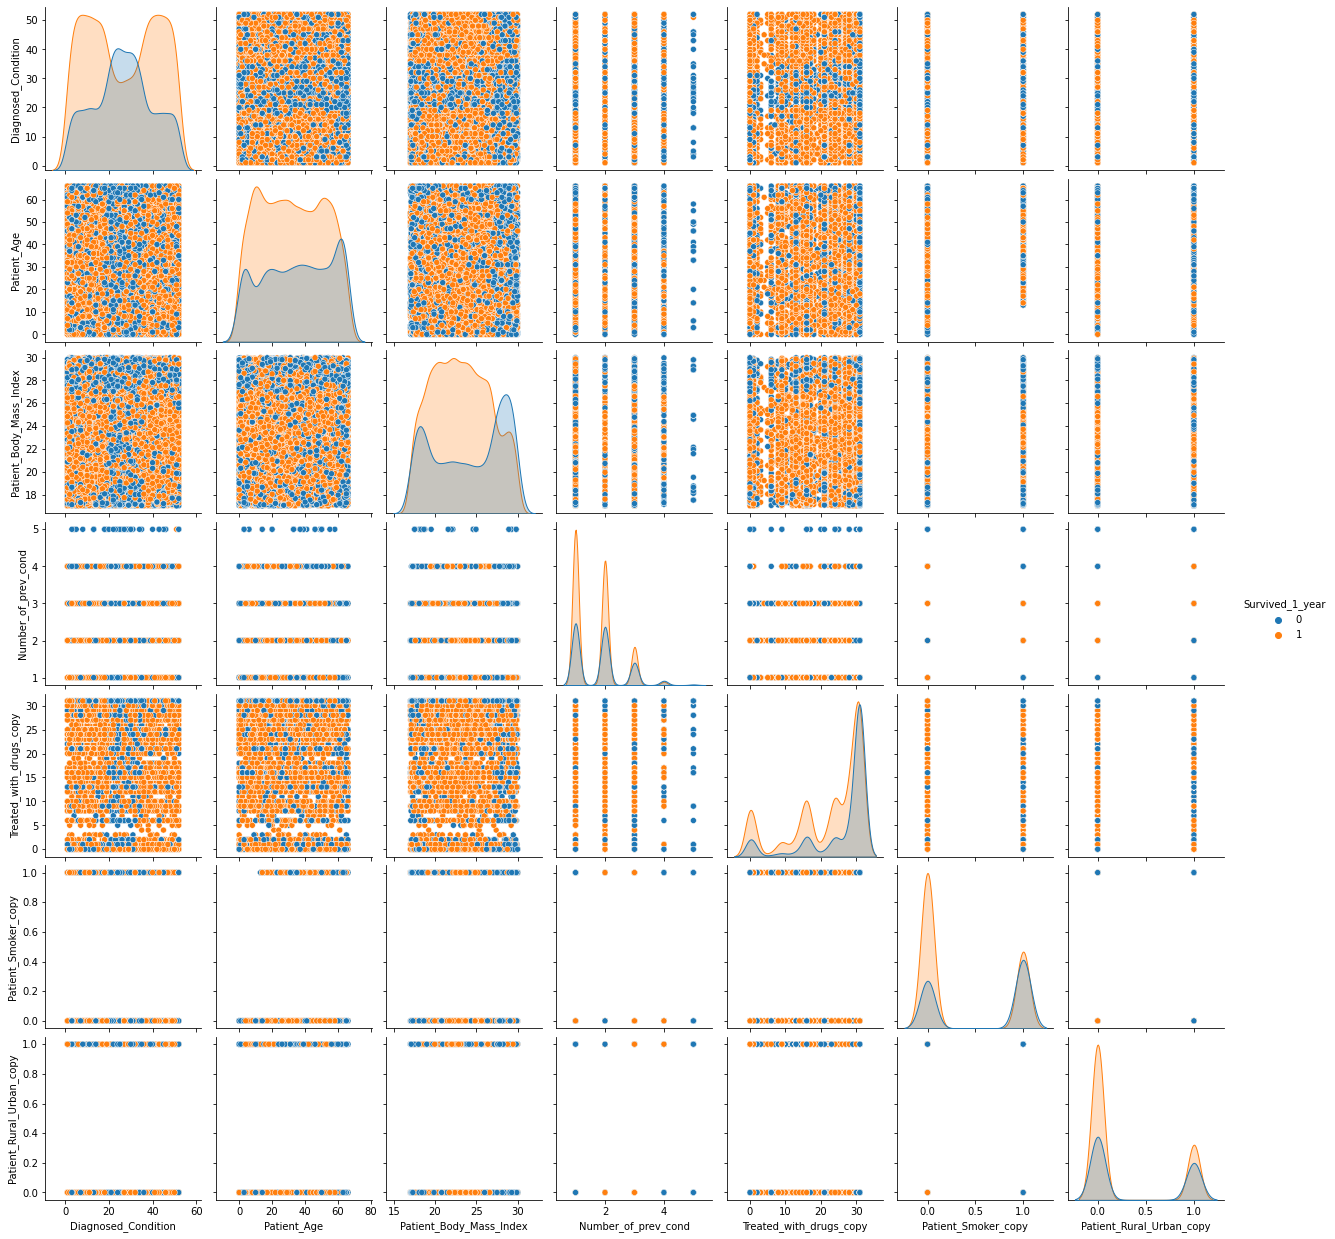

In [15]:
#Visualization of predictor and target variable
sns.pairplot(train_copy, hue='Survived_1_year')

<h1><center>4: MODEL TRAINING AND VALIDATION</center></h1>

#### 4.1: Creation of modelling subset

In [16]:
#Create input and target dataset.
x = train_copy.drop(['Survived_1_year'], axis=1)

y = train_copy['Survived_1_year']

In [17]:
#Split x and y dataset into test and train by calling train_test_split function and passing all necessary arguments into it.

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=42)

#### 4.2: Model buidling (Applying diﬀerent ML Models)

###### A: Decision tree

In [18]:
#decision tree (with all features)
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_predict_dt = model.predict(x_test)

###### B: Naives Bayes

In [19]:
#Naive Bayes (with all features) 
nb_model = GaussianNB()

nb_model.fit(x_train, y_train)

y_predict_nb = nb_model.predict(x_test)

###### C: Logistic Regression

In [20]:
#Logistic Regression
loR_model = LogisticRegression()

loR_model.fit(x_train, y_train)

y_predict_loR = loR_model.predict(x_test)

#### 4.3: Model evaluation

In [21]:
#Evaluate decision tree model
print('Training accuracy: ', accuracy_score(y_train, model.predict(x_train)))
print('Test accuracy: ', accuracy_score(y_test, y_predict_dt))
print('Test Precision score: ', precision_score(y_test, y_predict_dt))
print('Test Recall score: ', recall_score(y_test, y_predict_dt))
print('F1 Recall scoe: ', f1_score(y_test, y_predict_dt))

Training accuracy:  0.999628666914222
Test accuracy:  0.7519491770141495
Test Precision score:  0.8062803047794966
Test Recall score:  0.7989018531228552
F1 Recall scoe:  0.8025741208917492


In [22]:
#Evaluate Naives Bayes model
print('Training Accuracy: ', accuracy_score(y_train, nb_model.predict(x_train)))
print('Accuracy: ', accuracy_score(y_test, y_predict_nb))
print('Precision: ', precision_score(y_test, y_predict_nb))
print('Recall: ', recall_score(y_test, y_predict_nb))
print('F1: ', f1_score(y_test, y_predict_nb))

Training Accuracy:  0.7246565168956554
Accuracy:  0.720473577822697
Precision:  0.740565105710334
Recall:  0.8574696865705788
F1:  0.7947413061916878


In [23]:
#Evaluate Logistic Regression model (with all features)
print('Training Accuracy: ', accuracy_score(y_train, loR_model.predict(x_train)))
print('Accuracy: ', accuracy_score(y_test, y_predict_loR))
print('Precision: ', precision_score(y_test, y_predict_loR))
print('Recall: ', recall_score(y_test, y_predict_loR))
print('F1: ', f1_score(y_test, y_predict_loR))

Training Accuracy:  0.6961257581383835
Accuracy:  0.6959283857926654
Precision:  0.7193492155723417
Recall:  0.849691146190803
F1:  0.7791063561988673


#### 4.4: Creation of a comparison table function

In [24]:
def metric_tab():
    
    #Training Accuracy data
    ac_dt = accuracy_score(y_train, model.predict(x_train)).round(2)
    ac_nb = accuracy_score(y_train, nb_model.predict(x_train)).round(2)
    ac_lr = accuracy_score(y_train, loR_model.predict(x_train)).round(2)
    
    training_accuracy = {
        'Decision Tree': ac_dt, 
        'Naive Bayes': ac_nb,
        'Logistic Regression': ac_lr,
                             }

    #Test Accuracy data
    test_ac_dt = accuracy_score(y_test, y_predict_dt).round(2)
    test_ac_nb = accuracy_score(y_test, y_predict_nb).round(2)
    test_ac_lr = accuracy_score(y_test, y_predict_loR).round(2)
    
    test_accuracy = {
        'Decision Tree': test_ac_dt, 
        'Naive Bayes': test_ac_nb,
        'Logistic Regression': test_ac_lr,
                         }

    #Precision score data
    prec_scr_dt = precision_score(y_test, y_predict_dt).round(2)
    prec_scr_nb = precision_score(y_test, y_predict_nb).round(2)
    prec_scr_lr = precision_score(y_test, y_predict_loR).round(2)
    
    prec_score = {
        'Decision Tree': prec_scr_dt,
        'Naive Bayes': prec_scr_nb,
        'Logistic Regression': prec_scr_lr,
                      }

    #Recall score data
    rec_scr_dt = recall_score(y_test, y_predict_dt).round(2)
    rec_scr_nb = recall_score(y_test, y_predict_nb).round(2)
    rec_scr_lr = recall_score(y_test, y_predict_loR).round(2)

    rec_score = {
        'Decision Tree': rec_scr_dt, 
        'Naive Bayes': rec_scr_nb,
        'Logistic Regression': rec_scr_lr,
                        }
   
    #F1 score data
    f1_scr_dt = f1_score(y_test, y_predict_dt).round(2)
    f1_scr_nb = f1_score(y_test, y_predict_nb).round(2)
    f1_scr_lr = f1_score(y_test, y_predict_loR).round(2)

    f1_scr = {
        'Decision Tree': f1_scr_dt, 
        'Naive Bayes': f1_scr_nb,
        'Logistic Regression': f1_scr_lr,
                        }
    
    return training_accuracy, test_accuracy, prec_score, rec_score, f1_scr

In [25]:
data = metric_tab()
eval_score_compare_df = pd.DataFrame(data)
eval_score_compare_df = eval_score_compare_df.rename(index={0: 'Training Accuracy', 1 : 'Test Accuracy', 2: 'Precision score', 3: 'Recall score', 4:'F1 Score'})

In [26]:
eval_score_compare_df

,Decision Tree,Naive Bayes,Logistic Regression
Training Accuracy,1.00,0.72,0.70
Test Accuracy,0.75,0.72,0.70
Precision score,0.81,0.74,0.72
Recall score,0.80,0.86,0.85
F1 Score,0.80,0.79,0.78


<center><h5>Conclusion</h5>

<i>The models metric (as seen in the comparison table above) showed that Naive Bayes model performed better in predicting our target feature. Decision tree predicted the training data 100% and this is a case of overfitting.</i><center>

In [27]:
test = pd.read_csv("C:/Users/admin/Downloads/Test_Data (1).csv")

test.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/admin/Downloads/Test_Data (1).csv'

In [ ]:
submission = pd.DataFrame(y_predict_nb)

In [ ]:
submission = submission.to_csv(r"C:\Users\admin\Desktop\submission.csv", index=False, header=['prediction'])